Found 4189 images belonging to 3 classes.
Found 1150 images belonging to 3 classes.
Found 1267 images belonging to 3 classes.
{'MildDemented': 0, 'NonDemented': 1, 'VeryMildDemented': 2}
{'MildDemented': 0, 'NonDemented': 1, 'VeryMildDemented': 2}
{'MildDemented': 0, 'NonDemented': 1, 'VeryMildDemented': 2}


2025-05-29 18:24:12.180054: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-29 18:24:12.934618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22182 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:25:00.0, compute capability: 8.6


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

2025-05-29 18:24:16.409199: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2025-05-29 18:24:16.409536: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2025-05-29 18:24:16.425369: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22182 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:25:00.0, compute capability: 8.6


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


2025-05-29 18:24:18.651967: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22182 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:25:00.0, compute capability: 8.6



=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
flops: Number of float operations. Note: Please read the implementation for the math behind it.

Profi

2025-05-29 18:24:26.819841: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2025-05-29 18:24:29.260965: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


65/65 [==============================] - 76s 1s/step - loss: 0.9541 - acc: 0.5326 - val_loss: 0.9503 - val_acc: 0.5588 - lr: 1.0000e-04
Epoch 2/100
65/65 [==============================] - 66s 1s/step - loss: 0.7759 - acc: 0.6264 - val_loss: 0.7453 - val_acc: 0.6388 - lr: 1.0000e-04
Epoch 3/100
65/65 [==============================] - 65s 997ms/step - loss: 0.7177 - acc: 0.6674 - val_loss: 0.7707 - val_acc: 0.6360 - lr: 1.0000e-04
Epoch 4/100
65/65 [==============================] - 65s 993ms/step - loss: 0.6459 - acc: 0.7067 - val_loss: 0.8102 - val_acc: 0.6553 - lr: 1.0000e-04
Epoch 5/100
65/65 [==============================] - 66s 1s/step - loss: 0.5358 - acc: 0.7712 - val_loss: 0.7861 - val_acc: 0.6985 - lr: 1.0000e-04
Epoch 6/100
65/65 [==============================] - 65s 994ms/step - loss: 0.4909 - acc: 0.7876 - val_loss: 0.8045 - val_acc: 0.7270 - lr: 1.0000e-04
Epoch 7/100
65/65 [==============================] - 65s 998ms/step - loss: 0.3932 - acc: 0.8410 - val_loss: 1.5641

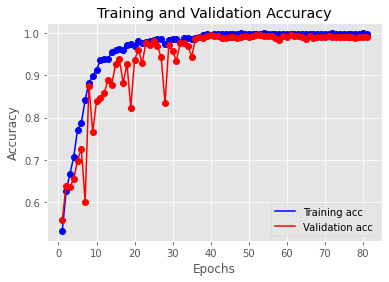

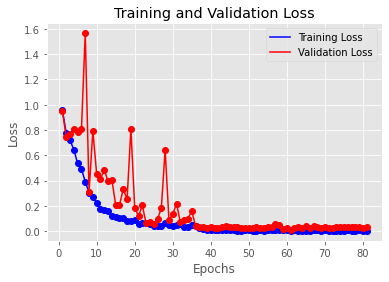

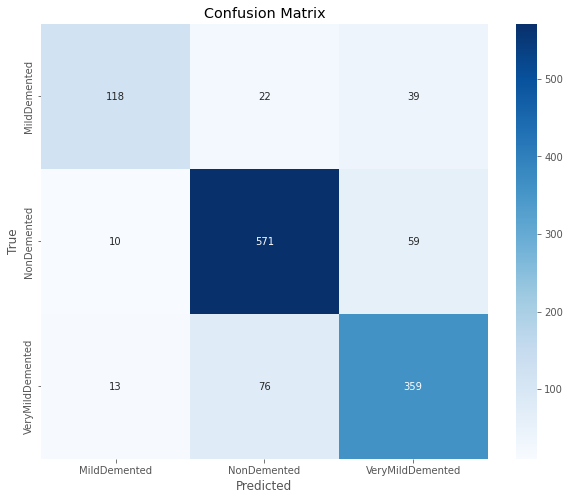

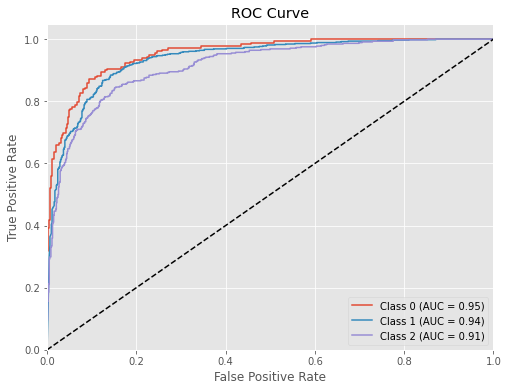

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.keras import models, layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore")

# Training, validation, and test directories
train_dir = './NewThree_Dataset/train'
validation_dir = './NewThree_Dataset/val'
test_dir = './NewThree_Dataset/test'

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(299, 299),
    batch_size=64
)

# Validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(299, 299),
    batch_size=64
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(299, 299),
    batch_size=64,
    shuffle=False
)

print(train_generator.class_indices)
print(test_generator.class_indices)
print(validation_generator.class_indices)

# Load InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(299, 299, 3))

conv_base.trainable = True
conv_base.summary()

# Build the custom model
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Convert to inference graph for FLOPs calculation
model_function = tf.function(lambda inputs: model(inputs))
concrete_function = model_function.get_concrete_function(tf.TensorSpec([1, 299, 299, 3], model.inputs[0].dtype))
frozen_func = convert_variables_to_constants_v2(concrete_function)
graph = frozen_func.graph

# Calculate FLOPs
with tf.compat.v1.Session(graph=graph) as sess:
    flops = tf.compat.v1.profiler.profile(
        graph=sess.graph,
        options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    )
    print('FLOPs: {}'.format(flops.total_float_ops))

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('.Alz/InceptionV3.h5')

# Evaluate on test, train, and validation sets
test_eval = model.evaluate_generator(test_generator)
print("Test accuracy:", test_eval)
train_eval = model.evaluate_generator(train_generator)
print("Train accuracy:", train_eval)
val_eval = model.evaluate_generator(validation_generator)
print("Validation accuracy:", val_eval)

plt.style.use('ggplot')

# Plot accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo')
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'ro')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('inceptionv3_accuracy.png')

plt.figure()
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'ro')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.savefig('inceptionv3_loss.png')

# Load model for evaluation
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.utils import to_categorical

model = load_model('.Alz/InceptionV3.h5')

# Predictions and true labels
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('inceptionv3_confusion_matrix.png')

# Classification report
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve
num_classes = 3
y_true_binary = to_categorical(y_true, num_classes=num_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('inceptionv3_roc_curve.png')